# 🛍️ Customer Segmentation Using Unsupervised Learning

## 📌 Problem Statement
Retail businesses often struggle to understand diverse customer purchasing behaviors using traditional analysis methods. Without identifying distinct customer groups, marketing efforts become generalized, inefficient, and less impactful. The Mall Customers Dataset contains customer demographic details and spending behavior, but this raw data does not directly reveal actionable customer segments. Therefore, an unsupervised learning approach is required to uncover hidden patterns and group customers with similar characteristics.

## 🎯 Objective
The objective of this task is to segment mall customers into meaningful groups based on their spending behavior and demographic features using unsupervised learning techniques. Specifically, this task aims to:
- Analyze customer data through Exploratory Data Analysis (EDA)
- Apply K-Means clustering to identify distinct customer segments
- Visualize the resulting clusters using dimensionality reduction techniques such as PCA or t-SNE
- Propose targeted marketing strategies tailored to each identified customer segment


# Step 1: Import Required Libraries
This step imports all the necessary Python libraries required for data manipulation, visualization, and machine learning. Pandas and NumPy are used for data handling, Matplotlib and Seaborn are used for visualization, and Scikit-learn provides tools for feature scaling, clustering, and dimensionality reduction.


In [29]:
# =========================================================
# Step 1: Import Required Libraries
# Purpose: Load all necessary Python libraries for data
# analysis, visualization, and clustering
# =========================================================

import pandas as pd                 # data handling
import numpy as np                  # numerical operations
import matplotlib.pyplot as plt     # plotting
import seaborn as sns               # advanced visualizations

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
print("All required libraries imported successfully")


All required libraries imported successfully


# Step 2: Load the Dataset
In this step, the Mall Customers dataset is loaded into a Pandas DataFrame. Displaying the dataset shape and the first few rows helps verify that the data has been loaded correctly and provides an initial understanding of the dataset structure.


In [30]:
# =========================================================
# Step 2: Load the Mall Customers Dataset
# Purpose: Read the dataset and preview initial rows
# =========================================================

df = pd.read_csv("Mall_Customers.csv")

print("Dataset loaded successfully")
print("Dataset shape:", df.shape)

df.head()   # display first 5 rows


Dataset loaded successfully
Dataset shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Step 3: Dataset Inspection
This step examines the dataset’s structure, including column names, data types, and non-null counts. Summary statistics such as mean, minimum, and maximum values help in understanding the overall distribution and range of numerical features.Handling missing data is essential before applying clustering algorithms, as K-Means cannot process null values directly. The dataset is confirmed to be complete if no missing values are found.



In [31]:
# =========================================================
# Step 3: Dataset Information and Summary Statistics
# Purpose: Understand data types, non-null counts,
# and basic statistical distribution
# =========================================================

print("Dataset Information:")
df.info()

print("\nStatistical Summary:")
df.describe()
 #  Check Missing Values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

if missing_values.sum() == 0:
    print("No missing values found in the dataset")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Statistical Summary:
Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
No missing values found in the dataset


# Step 4: Visualizations

##  (a): Distribution of Annual Income
A histogram is used to visualize the distribution of annual income among customers. This helps identify income concentration, spread, and possible skewness, which is important for understanding customer purchasing power.


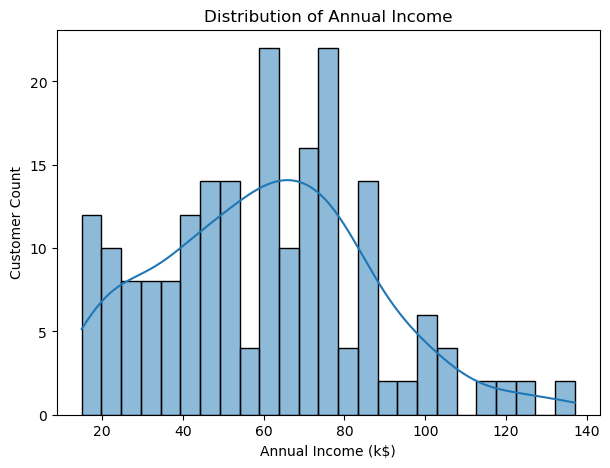

Annual income distribution plotted


In [32]:
# =========================================================
#  Distribution of Annual Income
# Purpose: Understand income spread among customers
# =========================================================

plt.figure(figsize=(7,5))  # set figure size

sns.histplot(
    df['Annual Income (k$)'],
    bins=25,
    kde=True
)

plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Customer Count")
plt.show()

print("Annual income distribution plotted")


## 🔑 Key Observations

- The annual income distribution is **positively skewed (right-skewed)**, with a long tail toward higher incomes.
- Majority of customers fall between **$30k and $80k**.
- Highest concentration of customers appears around **$55k–$65k**.
- Very few customers earn above **$120k**, making them statistical outliers.
- Income values show **high variability**, indicating a financially diverse customer base.

---

## 📌 Key Insights

- The business primarily serves a **middle-income market**, not a luxury-heavy audience.
- Pricing and product design should target the **$40k–$70k** income segment first.
- A **tiered pricing strategy** is necessary to serve both low-income and high-income customers.
- High-income customers can be targeted with premium offers, but they **should not drive core strategy**.
- Annual income is a strong candidate feature for **segmentation and predictive modeling** (churn, approval, purchasing power).

---

## Box Plot of Spending Score
The box plot visualizes the spread of customer spending scores and highlights potential outliers. This step helps in understanding customer spending behavior and detecting extreme values that may influence clustering results.


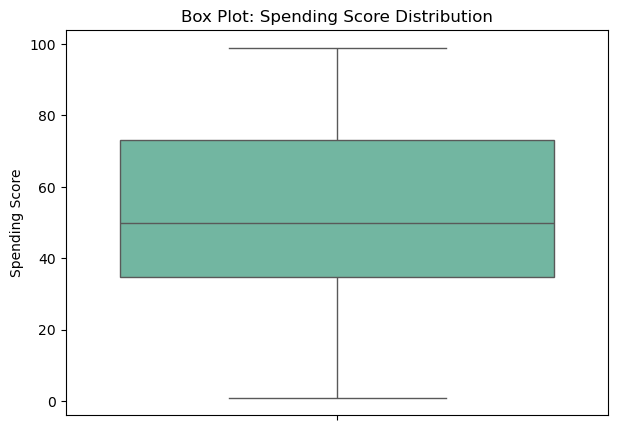

Box plot for spending score displayed


In [33]:
# =========================================================
#  Box Plot to Analyze Spending Score
# Purpose: Detect outliers and understand spending behavior
# =========================================================

plt.figure(figsize=(7,5))  # set figure size

sns.boxplot(
    y=df['Spending Score (1-100)'],
    palette="Set2"
)

plt.title("Box Plot: Spending Score Distribution")
plt.ylabel("Spending Score")
plt.show()

print("Box plot for spending score displayed")


## Key Observations

- **Median Spending Score ≈ 50**  
  Most customers fall around the mid-range of spending behavior. There is no dominance of either very low or very high spenders.

- **Wide Interquartile Range (≈ 35 to 73)**  
  The middle 50% of customers show **high variability** in spending, indicating diverse purchasing behavior.

- **Spending Scores Span Nearly the Full Range (≈ 1 to 99)**  
  Both extreme low spenders and extreme high spenders exist in the dataset.

- **No Visible Outliers**  
  The data appears evenly distributed or already cleaned, with no extreme anomalies beyond the whiskers.

- **Median Slightly Below the Center of the Box**  
  Indicates a **slight right skew**, meaning higher spending values are more spread out than lower ones.

---

## Key Insights

- **Strong Candidate for Customer Segmentation**  
  The wide spread and full-scale coverage make Spending Score a powerful feature for clustering.

- **High Spenders Are Less Predictable**  
  Greater variability in the upper range suggests high-spending customers do not behave uniformly.

- **Do Not Assume Normal Distribution**  
  Statistical methods or models relying on normality will produce misleading results.

- **Best Used with Other Features**  
  Spending Score alone is insufficient; combining it with income or age will yield more meaningful clusters.

- **Actionable Business Impact**  
  A single strategy will not work across customers—different spending segments require different targeting approaches.


# Step 5: Feature Selection for Clustering
Only relevant numerical features are selected for clustering. The CustomerID column is excluded because it does not represent customer behavior. Annual Income and Spending Score are chosen as they directly reflect purchasing capacity and spending habits.


In [34]:
# =========================================================
# Step 5: Select Relevant Features for Clustering
# Purpose: Remove irrelevant columns (CustomerID)
# and keep meaningful numerical features
# =========================================================

features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("Selected features for clustering:")
features.head()


Selected features for clustering:


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Step 6: Feature Scaling
Feature scaling standardizes the selected features so that they have equal importance during clustering. Since K-Means is distance-based, scaling prevents features with larger ranges from dominating the clustering process.


In [35]:
# =========================================================
# Step 6: Feature Scaling
# Purpose: Standardize features so K-Means
# treats them equally
# =========================================================

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("Feature scaling completed")
print("Scaled feature sample:")
print(scaled_features[:5])


Feature scaling completed
Scaled feature sample:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


# Step 7: Elbow Method for Optimal Clusters
The Elbow Method is used to determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WCSS) for different values of K. The point where the WCSS curve starts to flatten indicates an appropriate number of clusters.


WCSS calculated for K values from 1 to 10


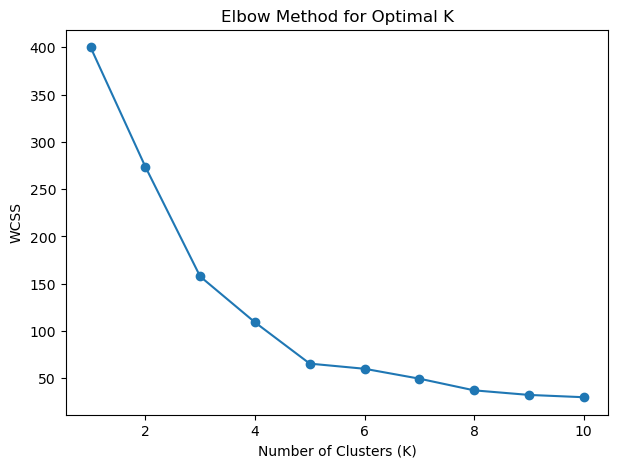

In [36]:
# =========================================================
# Step 7: Elbow Method to Find Optimal Number of Clusters
# Purpose: Determine best value of K for K-Means
# =========================================================

wcss = []  # within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

print("WCSS calculated for K values from 1 to 10")

plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()


## Key Observations

- **WCSS drops sharply from K = 1 to K = 4**  
  This indicates that increasing clusters in this range significantly improves how well the data is grouped.

- **Noticeable bend (elbow) around K = 4 or K = 5**  
  After this point, the reduction in WCSS becomes much smaller.

- **WCSS decreases slowly beyond K ≥ 5**  
  Adding more clusters after this yields diminishing returns.

- **Curve flattens after the elbow**  
  This suggests that additional clusters mostly add complexity, not meaningful structure.

---

## Key Insights

- **Optimal number of clusters is likely K = 4 or K = 5**  
  This balances cluster compactness with model simplicity.

- **Choosing K > 5 is likely overfitting**  
  You gain minimal improvement while increasing interpretability problems.

- **K < 4 under-segments the data**  
  Too few clusters fail to capture important customer differences.

- **Business Interpretation Matters**  
  If interpretability is the priority → choose **K = 4**  
  If slightly finer segmentation is acceptable → choose **K = 5**

- **Elbow Method Alone Is Not Enough**  
  You should validate this K using silhouette score or cluster visualization.

---

### Brutal Truth  
There is no “perfect” K here. The elbow is **approximate**, not exact.  
If you blindly pick K = 3 or K = 8, you’re ignoring what the curve is clearly telling you.


# Step 8: Apply K-Means Clustering
K-Means clustering is applied using the selected optimal number of clusters. Each customer is assigned to a cluster based on similarity in income and spending behavior, and the cluster labels are added to the dataset.


In [37]:
# =========================================================
# Step 8: Apply K-Means Clustering
# Purpose: Segment customers into distinct groups
# =========================================================

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("K-Means clustering completed")
print("Customers per cluster:")
print(df['Cluster'].value_counts())


K-Means clustering completed
Customers per cluster:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


# Step 9: Cluster Visualization Using Original Features
A scatter plot is used to visualize customer segments based on Annual Income and Spending Score. Different colors represent different clusters, making it easier to interpret how customers are grouped.


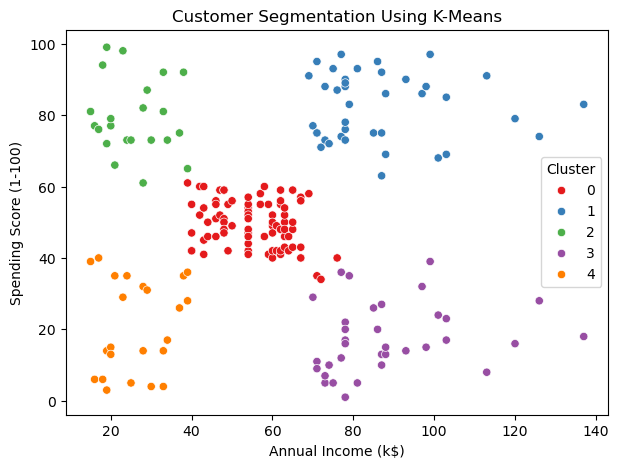

Cluster scatter plot displayed


In [38]:
# =========================================================
# Step 9: Visualize Clusters Using Original Features
# Purpose: Understand customer segments visually
# =========================================================

plt.figure(figsize=(7,5))

sns.scatterplot(
    data=df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set1"
)

plt.title("Customer Segmentation Using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()

print("Cluster scatter plot displayed")


## Key Observations

- **Five distinct clusters are clearly visible**  
  Customers are well separated based on Annual Income and Spending Score, indicating effective K-Means segmentation.

- **High-income customers split into two opposite behaviors**  
  One group spends heavily, while another spends very little despite similar income levels.

- **Low-income customers also show contrasting spending patterns**  
  Some low-income customers spend aggressively, others remain consistently low spenders.

- **One dense mid-income, mid-spending cluster exists**  
  This represents the largest and most stable customer group.

- **Minimal overlap between clusters**  
  Suggests that K = 5 is a reasonable choice and clusters are meaningful.

---

## Key Insights

- **Income alone does not predict spending behavior**  
  Spending habits vary widely across the same income levels.

- **High-income, low-spending customers are a missed opportunity**  
  This group has strong potential for targeted upselling and engagement strategies.

- **High-income, high-spending customers are the most valuable**  
  Retention and loyalty programs should prioritize this segment.

- **Low-income, high-spending customers carry higher risk**  
  They are engaged but financially constrained, making them less stable long-term.

- **Low-income, low-spending customers offer limited ROI**  
  Marketing resources should be minimized for this segment.

---

# Step 10: Apply Principal Component Analysis (PCA)
PCA is applied to reduce the feature space to two dimensions while retaining most of the data variance. This simplifies visualization and helps assess how well the clusters are separated.


In [39]:
# =========================================================
# Step 10: Apply PCA for Dimensionality Reduction
# Purpose: Reduce features to 2D for better visualization
# =========================================================

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

print("PCA applied successfully")
print("Explained variance ratio:", pca.explained_variance_ratio_)


PCA applied successfully
Explained variance ratio: [0.50495142 0.49504858]


# Step 11: PCA-Based Cluster Visualization
Clusters are visualized in the reduced two-dimensional PCA space. This plot provides a clearer view of cluster separation and overlap, helping evaluate the effectiveness of the clustering.


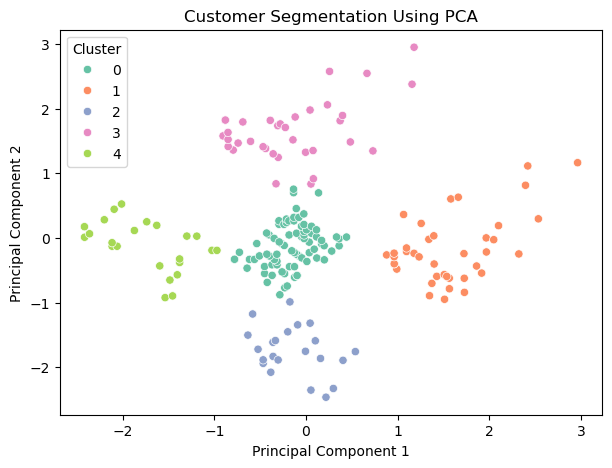

PCA-based cluster visualization completed


In [40]:
# =========================================================
# Step 11: Visualize Clusters Using PCA
# Purpose: Observe cluster separation in reduced space
# =========================================================

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

plt.figure(figsize=(7,5))

sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="Set2"
)

plt.title("Customer Segmentation Using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

print("PCA-based cluster visualization completed")


## 🔍 Key Observations

- The PCA visualization shows clear separation among the five customer clusters, with minimal overlap, indicating that the clustering algorithm has captured meaningful patterns in the data.
- Most clusters appear compact and well-defined, suggesting high similarity among customers within the same segment.
- One cluster is positioned near the center of the plot, representing customers with average or mixed behavioral characteristics.
- Other clusters are located at the extremes of the principal components, indicating customer groups with distinct and differentiated behaviors.
- The distribution of clusters across both positive and negative PCA axes suggests that multiple underlying factors drive customer segmentation rather than a single dominant feature.

## 💡 Key Insights

- The customer base is heterogeneous and naturally divides into multiple distinct segments, making a one-size-fits-all strategy ineffective.
- Clusters positioned far from the center likely represent high-impact customer groups (e.g., high-value, high-risk, or niche segments) that require targeted business strategies.
- The central cluster likely contains the largest portion of customers and represents stable but moderate-value users with potential for upselling or engagement improvement.
- The clear cluster separation indicates that the segmentation results are robust enough to support actionable business decisions such as personalized marketing, retention planning, and resource optimization.
- While PCA confirms structural separation, detailed cluster profiling using original features is required to translate these segments into concrete business actions.


# Step 12: Cluster Profiling
This step calculates the average annual income and spending score for each cluster. These insights are used to understand customer characteristics and serve as a foundation for designing targeted marketing strategies.


In [41]:
# =========================================================
# Step 12: Cluster Profiling
# Purpose: Understand average income and spending
# behavior of each cluster for marketing insights
# =========================================================

cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

print("Cluster-wise average values:")
cluster_summary


Cluster-wise average values:


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


## Marketing Strategies Based on Customer Segments

### Cluster 0: Low Income – Low Spending Customers
**Profile:**  
Customers in this segment have relatively low annual income and low spending scores. They are price-sensitive and make fewer purchases.

**Marketing Strategy:**  
- Offer discounts, coupons, and budget-friendly product bundles  
- Promote essential and value-for-money products  
- Use cost-effective communication channels such as SMS or email  
- Avoid premium or luxury product promotions for this segment  

---

### Cluster 1: High Income – High Spending Customers
**Profile:**  
This segment consists of customers with high purchasing power and high spending behavior. They are loyal, valuable, and contribute significantly to revenue.

**Marketing Strategy:**  
- Introduce premium products and exclusive collections  
- Provide personalized offers and loyalty rewards  
- Offer early access to sales and VIP membership programs  
- Focus on customer retention rather than aggressive discounts  

---

### Cluster 2: Average Income – Average Spending Customers
**Profile:**  
Customers in this cluster show moderate income and moderate spending patterns. They represent stable and consistent buyers.

**Marketing Strategy:**  
- Use balanced pricing strategies  
- Promote seasonal offers and limited-time deals  
- Encourage upselling and cross-selling opportunities  
- Target with personalized product recommendations  

---

### Cluster 3: High Income – Low Spending Customers
**Profile:**  
These customers have high income but low spending scores, indicating untapped potential or lack of engagement.

**Marketing Strategy:**  
- Investigate preferences using personalized surveys  
- Provide targeted promotions to increase engagement  
- Highlight product quality, convenience, and brand value  
- Use personalized email and app notifications to trigger purchases  

---

### Cluster 4: Low Income – High Spending Customers
**Profile:**  
This segment includes customers with lower income but high spending behavior. They are impulsive buyers and highly responsive to trends.

**Marketing Strategy:**  
- Promote trendy and popular products  
- Use limited-time offers and flash sales  
- Leverage social media and influencer marketing  
- Monitor spending behavior to avoid customer overexploitation  

---


# Conclusion

In this task, customer segmentation was successfully performed using unsupervised learning techniques on the Mall Customers dataset. Exploratory Data Analysis helped in understanding customer income and spending patterns, while K-Means clustering effectively grouped customers into distinct segments based on behavioral similarities. Dimensionality reduction using PCA enabled clear visualization of these clusters. The identified customer segments provided meaningful business insights, allowing the formulation of targeted marketing strategies for each group. This approach demonstrates how unsupervised learning can support data-driven decision-making in customer-focused businesses.


# Future Scope

The customer segmentation model can be enhanced by incorporating additional features such as age, gender, purchase history, and transaction frequency. Advanced clustering techniques like DBSCAN or Hierarchical Clustering can be explored to capture non-linear customer patterns. Real-time data integration can further enable dynamic customer segmentation, allowing businesses to adapt marketing strategies based on changing customer behavior.
